# **Support Vector Machines (SVM) en `scikit-learn`**


---
---


### **Generalidades de SVM**

* El método SVM nace como un método de clasificación lineal y binaria.

* Es un método de aprendizaje supervisado, es decir, los datos del problema consisten en un par (vector de características, etiquetas asociadas).

* Las SVM se fundamentan en el concepto de *Maximal Margin Classifier*, y este a su vez se fundamenta en el de hiperplano.

* Aunque originalmente solo abordaba un problema de clasificación binaria, se ha extendido a clasificación múltiple y regresión.

* Así mismo, la limitación a problemas lineales se extiende a clasificación no lineal mediante el [kernel trick](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Herramientas%20Te%C3%B3ricas/Kernels.pdf).

---


### **Sobre este notebook**

Se aborda la teoría de los clasificadores binarios SVM lineales y no lineales. El caso multiclase se deja para otro notebook.

Al final, como ejercicio, se aborda un problema de clasificación binaria no lineal mediante un método de kernel.


---

### **La frontera lineal de decisión: Hiperplano de separación**

En un espacio $d-$dimensional, un hiperplano es un subespacio plano $(d-1)-$dimensional que dado el conjunto de parámetros $\{w_j \in \mathbb{R}\}_{j=0}^d$, para una $d-$tupla $\vec{x}=(x_1, \dots , x_d)$, su ecuación es:

$$
w _0 +\sum _{k=1}^d w _k x_k=0
$$

Este hiperplano separa la región donde el conjunto $\{ x_k \}$ cumple que $w _0 +\sum _{k=1}^d w _k x_k < 0$, de la región donde $\{ x_k \}$ cumple que $w _0 +\sum _{k=1}^d w _k x_k > 0$

---


### **Clasificación binaria mediante un hiperplano: Caso linealmente separable perfectamente (l.s.p)**

Sea un conjunto de datos $D$, de $N$ observaciones con $d$ predictores (características) cada una, cuya variable de respuesta es binaria, con niveles de respuesta definidos por $\{+1,-1\}$:

$$
D=\{ \vec{x}^i=(x_1 ^i, \dots , x_d ^i ) \in \mathbb{R}^d, y_i = \pm 1 \}_{i=1}^N
$$

En un problema lineal se emplean hiperplanos para construir un clasificador que permita predecir a qué grupo pertenece una observación en función de sus predictores.

Si los $\vec{x}^i$ son linealmente separables perfectamente en las dos clases $\{+1,-1\}$, el hiperplano conduce a la siguiente clasificación:

$$
\begin{cases}
w _0 +\sum _{k=1}^d w _k x_k^i > 0 \text{, si } y_i=1 \\
w _0 +\sum _{k=1}^d w _k x_k^i < 0 \text{, si } y_i=-1
\end{cases}
$$

Estas dos expresiones anteriores se pueden simplificar mediante una sola expresión:

$$
y_i(w _0 +\sum _{k=1}^d w _k x_k^i) > 0 \text{, } ∀ i=1, \dots, N
$$

El clasificador más simple consiste en asignar cada $\vec{x}^i$ a una de las dos clases dependiendo el lado del hiperplano.

Dado un vector de características $\vec{x} \in \mathbb{R}^d$ y el vector de pesos asociado $\vec{w}=(w_0, w_1, \dots , w_d) \in \mathbb{R}^{d+1}$ , definimos la forma analítica del modelo de clasificación lineal binaria mediante:

\begin{align}
f : \mathbb{R}^d &\to \mathbb{R} \\
\vec{x} &\to w_0 + \sum_{k=1}^d w_k x_k
\end{align}

En donde la clasificación de la observación $\vec{x}^*$ es acorde al signo:

$$
sign\{f(\vec{x}^*)\}=\begin{cases}
+1 \text{, } w_0 + \sum_{k=1}^d w_k x_k >0 \text{ ($\vec{x}^*$ pertenece a la clase +1)}\\
-1 \text{, } w_0 + \sum_{k=1}^d w_k x_k <0 \text{ ($\vec{x}^*$ pertenece a la clase -1)}
\end{cases}
$$



---

### **Maximal Margin Hyperplane**


La definición del hiperplano para casos linealmente separables perfectamente conduce a una infinidad de valores $\{w_j\}$, $\{x_k\}$ que cumplen que $w _0 +\sum _{k=1}^d w _k x_k=0$. Por ello, se necesita hallar al clasificador óptimo, es decir, el hiperplano óptimo de separación, que recibe el nombre de *Maximal Margin Hyperplane* (MMH):

* El MMH es el hiperplano que se encuentra más alejado de todos los datapoints de entrenamiento.

* Se obtiene calculando la distancia perpendicular de cada $\vec{x}^i$ a un hiperplano.

* A la distancia desde el hiperplano hasta los puntos más cercanos de cada clase se le llama margen.

* Entonces, el MMH es el hiperplano con mayor margen asociado.

* De las ideas anteriores nace la necesidad de plantear un problema de optimización mediante la maximización del margen.



---

### **El margen y las condiciones de separabilidad**

Definimos el margen de un hiperplano como la distancia entre las observaciones más cercanas de cada clase con respecto a este hiperplano, por ello el problema a resolver en las SVM es maximizar el margen para mejorar la generalización del modelo.


Sea $\vec{w}^T \vec{x}+b=0$ la ecuación del hiperplano de separación óptimo, para que separe las clases correctamente en el caso binario linealmente separable perfectamente, se impone

$$
y_i(\vec{w}^T \vec{x}+b) \geq 1
$$

Por lo tanto, si $y_i =1$, se tiene que $\vec{w}^T \vec{x}+b \geq 1$.

Y si $y_i =-1$, se tiene que $\vec{w}^T \vec{x}+b \leq 1$.

Los puntos que cumplen com ambos casos, es decir, $y_i(\vec{w}^T \vec{x}+b)=1$ son llamados vectores de soporte. Estos se interpretan como los vectores de características del conjunto de entrenamiento más cercanos al hiperplano de separación.

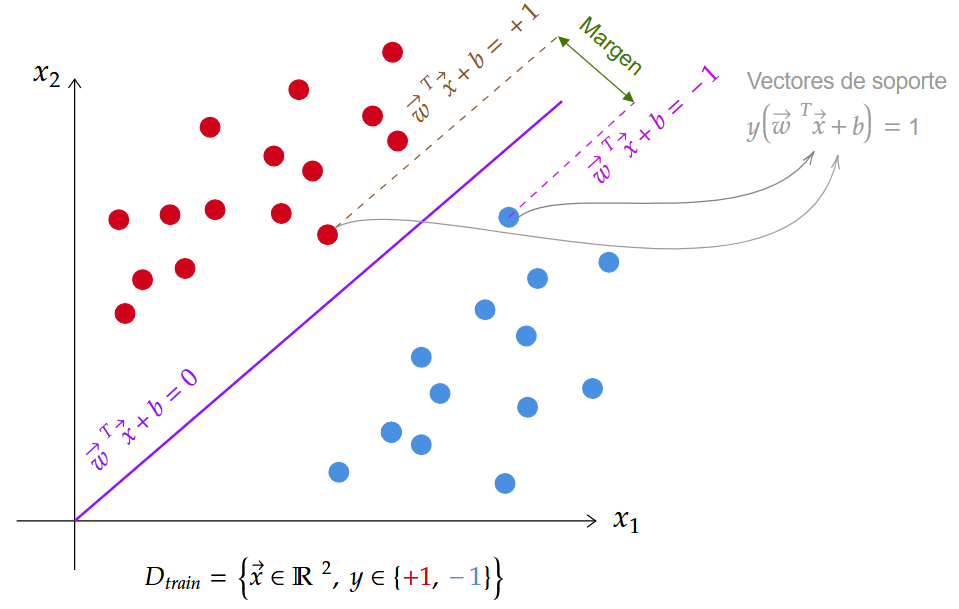


---


### **El problema de optimización: Maximización del margen**

Sean dos hiperplanos $\vec{w}^T \vec{x}+c_1=0$  y  $\vec{w}^T \vec{x}+c_2=0$, en un espacio euclidiano la distancia entre ellos es:

$$
D=\frac{|c_2 - c_1|}{||\vec{w}||}
$$

De acuerdo al problema binario linealmente separable perfectamente, se tienen los siguientes hiperplanos asociados a las clases:

$$
\begin{cases}
\vec{w}^T \vec{x}+b=1 \text{, clase +1} \\
\vec{w}^T \vec{x}+b=-1 \text{, clase -1}
\end{cases}
$$

De acuerdo a la forma general, $\vec{w}^T \vec{x}+c_i=0$, tenemos que $c_1=-1$ y $c_2=1$, por lo que

$$
D=\frac{|1-(-1)|}{||\vec{w}||}
$$

Por lo que el margen es:

$$
M=\frac{2}{||\vec{w}||}
$$



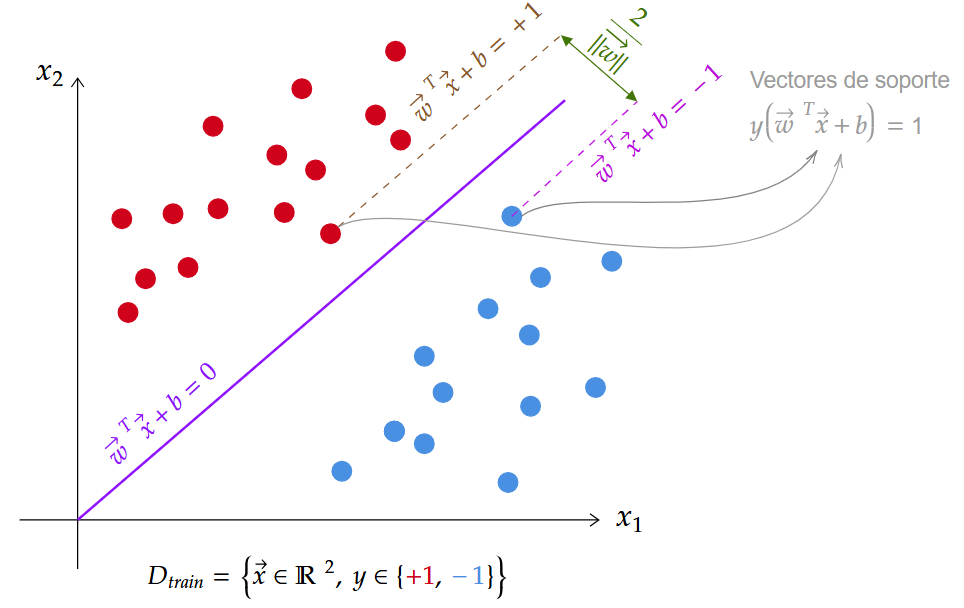

Entonces, el problema de optimización consiste en hallar

$$
γ_i=ArgMax_{\vec{w},b}\{\frac{2}{||\vec{w}||} \} \text{, sujeto a } y_i(\vec{w}^T \vec{x}+b) \geq 1
$$

A su vez, este problema es equivalente a

$$
γ_i=ArgMin_{\vec{w},b}\{\frac{1}{2} ||\vec{w}||^2 \} \text{, sujeto a } y_i(\vec{w}^T \vec{x}+b) \geq 1
$$

Por lo que hablamos de un problema de optimización cuadrática convexa con restricciones lineales, el cual resolveremos mediante multiplicadores de Lagrange.

Definimos el lagrangiano:

$$
\mathcal{L}(\vec{w},b,\alpha)= \frac{1}{2} ||\vec{w}||^2- ∑_{i=1}^N \alpha _i[y_i(\vec{w}^T \vec{x}_i+b)-1] \text{, con } \alpha _i \geq 0
$$

Paso 1:

$$
∇_{\vec{w}}\mathcal{L}= \vec{w}- ∑_{i=1}^N \alpha _i y_i \vec{x}_i=\vec{0} ⇒ \vec{w}= ∑_{i=1}^N \alpha _i y_i \vec{x}_i
$$

Paso 2:

$$
\frac{∂\mathcal{L}}{∂b}=- ∑_{i=1}^N \alpha _i y_i=0
$$

Reemplazando en $\mathcal{L}(\vec{w},b,\alpha)$, obtenemos la forma dual del problema:

$$
\alpha ^*=ArgMax_{\alpha}\{∑_{i=1}^N \alpha _i- \frac{1}{2}∑_{i=1}^N∑_{j=1}^N \alpha _i \alpha _j y_i y_j \vec{x}^T _i \vec{x}_j\}
$$

Sujeto a $∑_{i=1}^N \alpha _i y_i=0 $ y $\alpha _i \geq 0$.

---


### **El clasificador SVM**

El clasificador resultante del problema anterior se obtiene, para una muestra $\vec{x}_k$ como:

$$
f(\vec{x}_k)= sign\{∑_{i=1}^N \alpha _i y_i \vec{x}^T _i \vec{x}_k +b\}=\begin{cases}
-1 \text{, si } ∑_{i=1}^N \alpha _i y_i \vec{x}^T _i \vec{x}_k +b <0 \\
+1 \text{, si } ∑_{i=1}^N \alpha _i y_i \vec{x}^T _i \vec{x}_k +b >0
\end{cases}
$$

Y los vectores de soporte son los $\vec{x} _i$ tal que $\alpha _i >0$, los cuales determinan la posición del hiperplano de separación.

---


### **SVM más allá del caso l.s.p: Soft Margin SVM**

En problemas del mundo real no suele haber una separación lineal de forma perfecta, por lo que usar un hiperplano de separación conduce a errores en la clasificación. Esto puede asociarse a dos casos:

1) El problema no es lineal y se aborda mediante [métodos de kernels](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Herramientas%20Te%C3%B3ricas/Kernels.pdf). Este caso se abordará más adelante.

2) El problema es aproximadamente linealmente separable. Es decir, se extiende el concepto de MMH para obtener un hiperplano que separe las clases, pero permitiendo un error de clasificación.

Al modelo que aborda el caso del segundo punto se le conoce como Soft Margin SVM y es el que abordaremos en esta ocasión.

---


### **Maximal Margin Hyperplane vs Soft Margin**

* Aún bajo condiciones ideales, el MMH presenta dos inconvenientes:

    1. Es sensible a variaciones en los datos, lo cual implica poca robustez del modelo.

    2. Está ajustado perfectamente a las observaciones, lo cual conlleva al overfitting.

* Es preferible crear un hiperplano clasificador más robusto (aunque no perfecto) y con mayor capacidad predictiva ante nuevos datos (menos overfitting).

* Soft Margin permite ciertas observaciones en el lado incorrecto del hiperplano.


---


### **El hiperparámetro $C$ en Soft Margin SVM**

El método Soft Margin incluye un hiperparámetro, $C$, el cual controla el número de violaciones del hiperplano que se toleran en el proceso de ajuste. Se le conoce como el hiperparámetro de regularización.

* Si $C →0$, menos se penalizan los errores, entonces hay más observaciones $\vec{x}$ en el lado incorrecto del hiperplano (margen más ancho, más bias, menos varianza).

* Si $C → ∞$, no se permiten violaciones, por lo que el modelo es equivalente al MMH (menor margen, menos bias, más varianza).

* $C$ controla el balance bias-variance del modelo.

* En la práctica el $C$ óptimo se determina mediante algún algoritmo de [Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).

---


### **Problema de optimización de Soft Margin SVM**

* Antes:

En el caso l.s.p teníamos que dado un conjunto de datos de entrenamiento $D_{train}=\{\vec{x}_i \in \mathbb{R}^d, y_i \in \{+1,-1\}\}_{i=1}^N$,  el objetivo es encontrar los parámetros $\vec{w} \in \mathbb{R}^d$ y $b \in \mathbb{R}$ óptimos tal que se minimice la función objetivo $\frac{1}{2} ||\vec{w}||^2$ (lo cual es equivalente a maximizar el margen), con la restricción $y_i (\vec{w}^T \vec{x}_i+b) \geq 1$. Entonces tenemos que:

$$
\begin{cases}
\text{Si } y_i=1 \Rightarrow \vec{w}^T \vec{x}_i+b \geq 1\\
\text{Si } y_i=-1 \Rightarrow \vec{w}^T \vec{x}_i+b \leq 1
\end{cases}
$$

* Ahora:

Siendo que el enfoque ahora una penalización en los errores de clasificación, las restricciones de desigualdad deben adaptarse a los datos que no son linealmente separables. Esto se hace introduciendo variables de holgura (slack variables, $𝜺$) con valores positivos en las restricciones del problema de optimización. Sea $𝜺 >0$:

$$
\begin{cases}
\text{Si } y_i=1 \Rightarrow \vec{w}^T \vec{x}_i+b \geq 1- 𝜺 _i\\
\text{Si } y_i=-1 \Rightarrow \vec{w}^T \vec{x}_i+b \leq 1 + 𝜺 _i
\end{cases}
$$

De tal forma que el problema de minimización asociado a Soft Margin es:

$$
ArgMin_{\vec{w},b,𝜺}\{\frac{1}{2}||\vec{w}||^2 + C \sum _{i=1}^N 𝜺_i\}
$$


Entonces, se maximiza el margen minimizando $\frac{1}{2}||\vec{w}||^2 = \frac{1}{2}\vec{w}^T \vec{w}$ mientras se toma en cuenta la penalización cuando una parte de los vectores de características es mal clasificada.

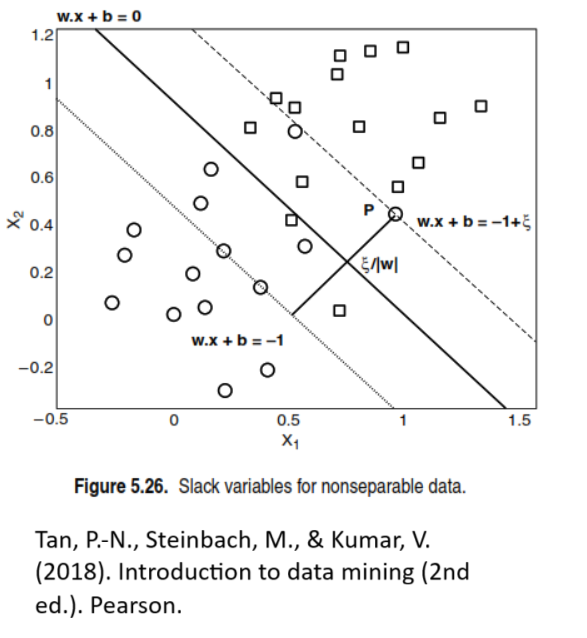



---


### **SVM no lineales**

Soft Margin SVM consigue buenos resultados cuando la separación entre clases es aproximadamente lineal, pero cuando no es lineal, su capacidad decrece.

En un escenario de separación no lineal, se transforma la representación de los datos a un espacio de mayor dimensión donde el problema sea lineal. Esta transformación adecuada es determinada mediante el [kernel trick](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Herramientas%20Te%C3%B3ricas/Kernels.pdf) (métodos de kernels).

* Cada kernel tiene hiperparámetros cuyo valor óptimo se encuentra mediante algún algoritmo de [Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).

* En general, no hay un mejor kernel a usar que el resto, depende de la naturaleza y necesidades del problema.

* Comunmente se recomienda probar el kernel gaussiano pues es flexible ante clasificadores lineales y clasificadores complejos.


---


### **El problema de optimización en SVM no lineales**

El problema de optimización se define en hallar

$$
\vec{\alpha}^*=ArgMin_{α}\{\frac{1}{2}\vec{\alpha}^T Q \vec{\alpha}- \vec{e}^T \vec{\alpha}\}
$$

Sujeto a $\vec{y}^T \vec{\alpha} =0$ y $0 \leq \alpha _i \leq C$, para cada $i \in \{1, \dots , N\}$.

* $\vec{y} \in \mathbb{R}^N$ es el vector de etiquetas.

* $\vec{\alpha} \in \mathbb{R}^N$ es el vector cuyas entradas $\alpha _i$ son los coeficientes duales acotados por $C$.

* $\vec{e} \in \mathbb{R}^N$ es el vector de unos.

* $Q \in \mathbb{R}^{N \times N}$ es una matriz positiva semidefinida tal que $[Q]_{ij}=y_i y_j k(\vec{x}_i,\vec{x}_j)$, en donde el kernel es $k(\vec{x}_i,\vec{x}_j)= \vec{\phi}(\vec{x}_i)^T \vec{\phi}(\vec{x}_j)$.

* $\vec{x}_i$ y $\vec{x}_j$ son los vectores de entrenamiento que se mapean a un espacio de mayor dimensión mediante $\vec{\phi}$.


---


### **Clasificación mediante SVM no lineal**

Resuelto el problema de optimización, el clasificador final de un vector de características resulta en:

$$
f(\vec{x}) = sign \{\sum _i y_i \alpha _i k(\vec{x}_i,\vec{x}_j) +b \}
$$

---


### **Sintaxis de SVM en `scikit-learn`**

```
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

modelo = SVC( C, kernel, hiperparámetro_kernel(si es el caso) )

#Entrenamiento:
modelo.fit(X_train, y_train)

#Predicción:
y_pred = modelo.predict(X_test)
```

El argumento `C` corresponde al hiperparámetro de regularización, y recibe un valor flotante  positivo.

Por otro lado, `kernel` también puede verse como un hiperparámetro, y recibe una string, y en algunos casos, este argumento se acompaña de otro hiperparámetro (que puede tomar distintos valores) dependiendo del kernel:

*  `kernel = 'linear'`
*  `kernel = 'poly', degree`$∈ \mathbb{N}^+$
*  `kernel = 'rbf', gamma`$\in$ {`'scale'`, `'auto'`, flotante positivo}. Este es el valor por default.

    Teniendo que el kernel gaussiano es $k(\vec{x}_i, \vec{x}_j)=\exp(-\gamma||\vec{x}_i - \vec{x}_j||^2)$, cuando `gamma='scale'` (es el valor por default), se tiene que:

    $$
    \gamma =\frac{1}{d \cdot \overline{Var}(X)}
    $$

    Con $d$ el número de características, es decir, la dimensión de los vectores de características, $\vec{x} \in \mathbb{R}^d$. Y $\overline{Var}(X)$ la varianza media de los vectores de características ($X$ denota la matriz de diseño).

    Por otro lado, cuando `gamma='auto'`, se tiene que:

    $$
    \gamma =\frac{1}{d}
    $$


*  `kernel = 'sigmoid'`
*  `kernel= 'precomputed'`. Se usa cuando se quiere tomar una función de similitud $k(\vec{x}, \vec{x}') = \vec{\phi}(\vec{x})^T \vec{\phi}(\vec{x}')$ personalizada o definida por el usuario.

---


### **Proyecto. Clasificación Binaria No Lineal: Importancia médica en especies mexicanas de arañas mediante SVM**

Trabajaremos con una base de datos con información sobre arañas en el territorio mexicano que ya fue preprocesada anteriormente.

Desarrollaremos un modelo de clasificación SVM binaria con el fin de determinar si una araña es de importancia médica o no. Esta variable es la etiqueta del problema.


# **Importación y exploración del dataset**

In [170]:
import chardet

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/SVM/Arañas2.csv'

with open(file_path, "rb") as f:
    rawdata = f.read(5000)

result = chardet.detect(rawdata)
result

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv(file_path)
display(df.head())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.info())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Tenemos {df.shape[0]} vectores de características con {df.shape[1]} características')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.columns)

,Tamaño corporal (mm),Color principal,Número de ojos,Importancia Médica,Hábitat,Especie,Patas con bandas de color,Estado de observación,Encontrada en rincón de casa,Forma del abdomen,Número de Patas
0,21.9,rojizo,8,No,desierto,Araña lobo,no,Yucatán,no,ovalado,8
1,47.8,amarillo,8,No,bosque,Araña de jardin,Si,Baja California,no,redondo,8
2,37.9,negro,6,Si,urbano,Araña violinista,no,Baja California,no,triangular,8
3,31.9,rojizo,8,No,bosque,Tarántula,Si,Yucatán,no,triangular,8
4,12.0,rojizo,8,No,bosque,Araña de jardin,Si,Oaxaca,no,ovalado,8


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tamaño corporal (mm)          133 non-null    float64
 1   Color principal               133 non-null    object 
 2   Número de ojos                133 non-null    int64  
 3   Importancia Médica            133 non-null    object 
 4   Hábitat                       133 non-null    object 
 5   Especie                       133 non-null    object 
 6   Patas con bandas de color     133 non-null    object 
 7   Estado de observación         133 non-null    object 
 8   Encontrada en rincón de casa  133 non-null    object 
 9   Forma del abdomen             133 non-null    object 
 10  Número de Patas               133 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 11.6+ KB
None
°°°°°°°°

In [172]:
#Explorando la etiqueta objetivo
print(pd.unique(df['Importancia Médica']))
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Transformando la columna categórica 'Importancia Médica' en numérica para el modelo
df['Importancia Médica'] = df["Importancia Médica"].map({"No": 0, "Si": 1})
print(df['Importancia Médica'].dtype)

['No' 'Si']
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
int64


# **Visualización de datos: ¿El dataset es linealmente separable?**

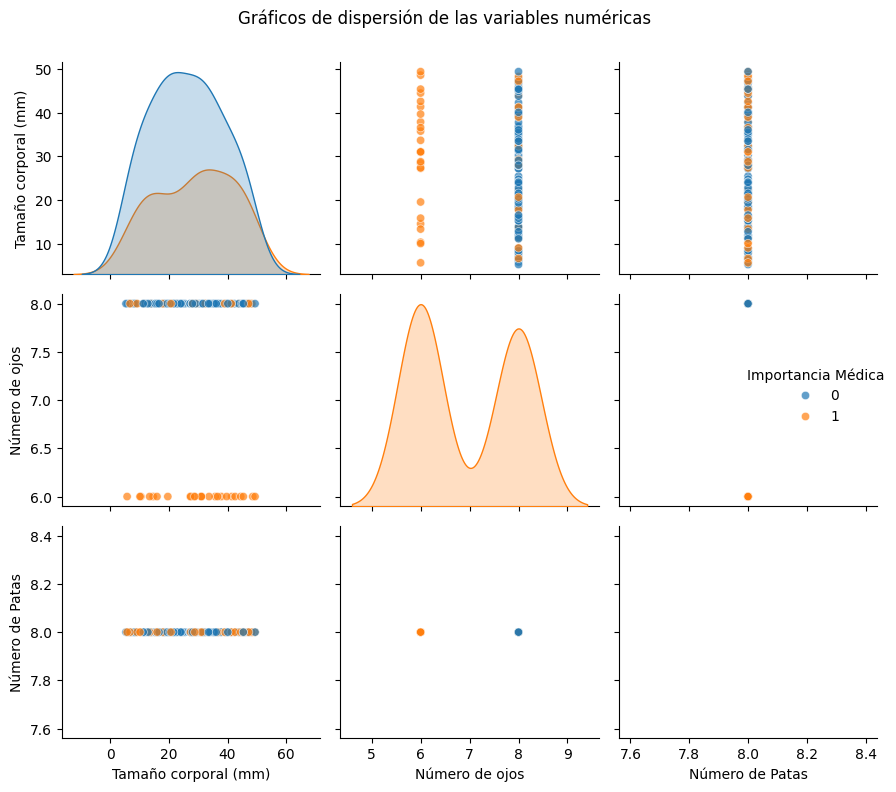

In [173]:
#Aislando las variables numéricas en una lista
vars_numericas = ["Tamaño corporal (mm)", "Número de ojos", "Número de Patas"]

#Gráficos de acuerdo a la importancia médica
sns.pairplot(df, vars=vars_numericas, hue="Importancia Médica", plot_kws={'alpha':0.7})
plt.tight_layout()
plt.suptitle("Gráficos de dispersión de las variables numéricas", y=1.05)
plt.show()

En el scatterplot podemos ver que los datos no siguen la tendencia de ser linealmente separables, por lo que debemos ajustar un modelo kernelizado.

Usaremos la sugerencia de probar el kernel gaussiano.

# **Preprocesamiento**

La base de datos ya fue limpiada anteriormente, pero ahora es necesario tratar las columnas categóricas adecuadamente, transformándolas a variables numéricas para que el modelo SVM pueda operar sobre estas características.

In [174]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Definimos la matriz de diseño y el vector de etiquetas
X = df.drop(columns=['Importancia Médica'])
y = df["Importancia Médica"]

#Aislando las variables categóricas
var_cat = X.select_dtypes(include=["object"]).columns.tolist()
print(var_cat)

#Transformando a variables dummy mediante OHE
transformador = ColumnTransformer(transformers=[("variables_categóricas", OneHotEncoder(drop="first"), var_cat)])
#drop="first" se incluye para evitar colinealidad, pues el modelo SVM puede verse afectado con la colinealidad.

['Color principal', 'Hábitat', 'Especie', 'Patas con bandas de color', 'Estado de observación', 'Encontrada en rincón de casa', 'Forma del abdomen']


# **Determinando el mejor Modelo SVM**

El modelo tiene principalmente dos parámetros a ajustar para ofrecer el mejor rendimiento, la regularización y el tipo de kernel, y dependiendo del kernel se presentan o no otros hiperparámetros a ajustar.



**SVM mediante el Kernel Gaussiano:**

Empezaremos siguiendo la sugerencia de probar el kernel RBF, el cual presenta el hiperparámetro $\gamma$.

Para obtener los hiperparámetros $C$ y $γ$ óptimos, usaremos el método [Randomized Search Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf), que es menos costoso computacionalmente que [Grid Search Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).

Los mejores hiperparámetros son: {'ModeloRBF__C': 1, 'ModeloRBF__gamma': 'scale'}
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Las métricas de evaluación son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisión del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


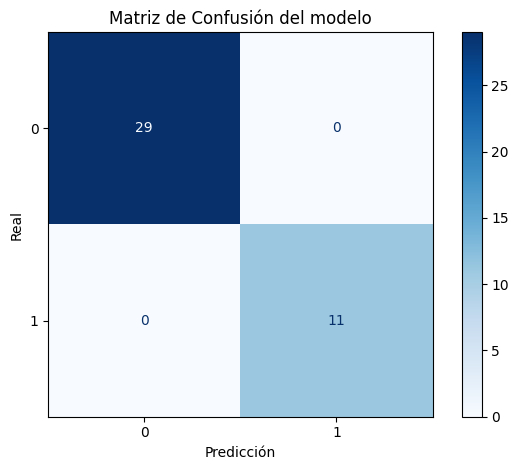

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

#Modelo SVM mediante una pipeline
pipeline_rbf = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF", SVC(kernel="rbf"))
])

#Espacio de búsqueda de hiperparámetros
dis_rbf = {
    "ModeloRBF__C": randint(1, 10),
    "ModeloRBF__gamma": ["scale", "auto"]
}

#División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_rbf = RandomizedSearchCV(
    estimator=pipeline_rbf,
    param_distributions=dis_rbf,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_rbf.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_rbf.predict(X_test)
print("Los mejores hiperparámetros son:", RS_rbf.best_params_)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Las métricas de evaluación son:\n {classification_report(y_test, y_pred)}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

accuracy = RS_rbf.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisión del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_rbf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión del modelo")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Sospechosamente las métricas de error arrojan una clasificación ideal, por lo que el [overfitting](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf) parece estar presente.

Para detectarlo vamos a trabajar con la [curva de aprendizaje](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).


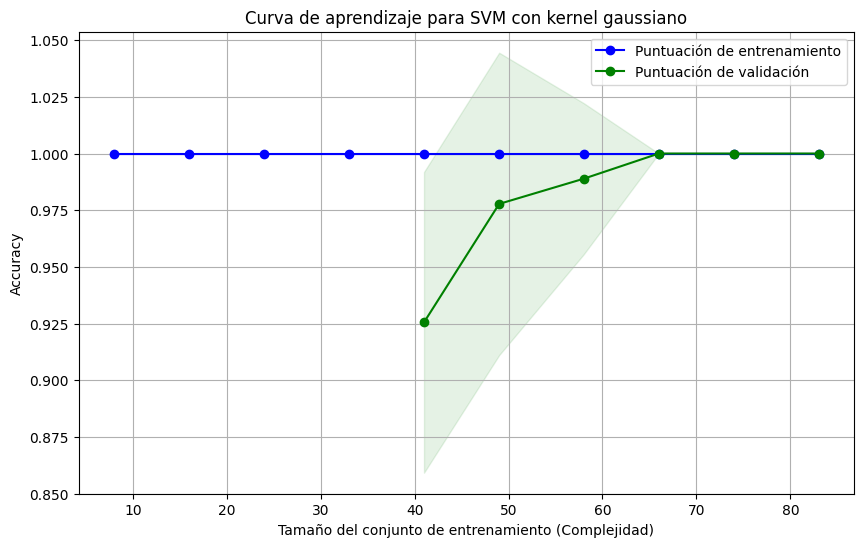

In [176]:
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Pipeline para la curva
optimos = RS_rbf.best_params_
pipeline_optimo = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF", SVC(kernel="rbf", C=optimos["ModeloRBF__C"], gamma=optimos["ModeloRBF__gamma"]))
])

#Generando la curva de aprendizaje para observar el posible sobreajuste. Usaremos la métrica Accuracy.
train_sizes, train_scores, test_scores = learning_curve(
    pipeline_optimo,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    scoring='accuracy')

#Medias y desviaciones estándar de los scores (en este caso Accuracy)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Gráfica
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Puntuación de entrenamiento", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, label="Puntuación de validación", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Curva de aprendizaje para SVM con kernel gaussiano")
plt.xlabel("Tamaño del conjunto de entrenamiento (Complejidad)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()

En efecto, hay overfitting, por lo que hay que cambiar de parámetros.

**SVM mediante el Kernel Lineal:**

Los mejores hiperparámetros son: {'ModeloLin__C': 1}
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Las métricas de evaluación son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisión del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


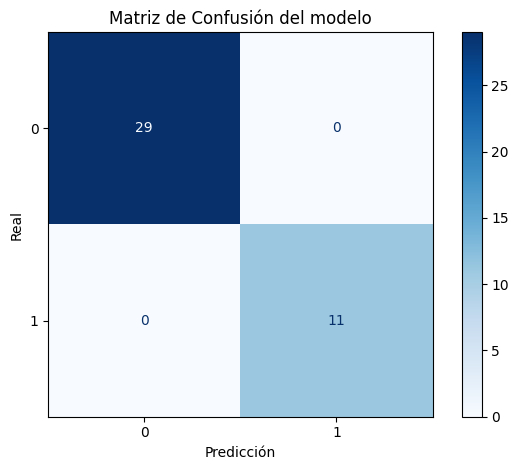

In [177]:
#Modelo SVM mediante una pipeline
pipeline_linear = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloLin", SVC(kernel="linear"))
])

#Espacio de búsqueda de hiperparámetros
dis_linear = {
    "ModeloLin__C": randint(1, 10),
}

#División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_linear = RandomizedSearchCV(
    estimator=pipeline_linear,
    param_distributions=dis_linear,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_linear.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_linear.predict(X_test)
print("Los mejores hiperparámetros son:", RS_linear.best_params_)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Las métricas de evaluación son:\n {classification_report(y_test, y_pred)}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

accuracy = RS_linear.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisión del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_linear.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión del modelo")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Se tiene el mismo caso con el kernel lineal.

**SVM mediante el Kernel Polinomial:**

Los mejores hiperparámetros son: {'ModeloPoly__C': 8, 'ModeloPoly__degree': 1}
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Las métricas de evaluación son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisión del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


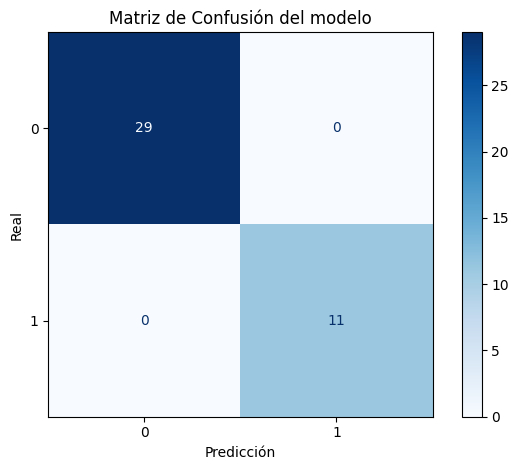

In [178]:
#Modelo SVM mediante una pipeline
pipeline_poly = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloPoly", SVC(kernel="poly"))
])

#Espacio de búsqueda de hiperparámetros
dis_poly = {
    "ModeloPoly__C": randint(1, 10),
    "ModeloPoly__degree": randint(1, 10)
}

#División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_poly = RandomizedSearchCV(
    estimator=pipeline_poly,
    param_distributions=dis_poly,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_poly.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_poly.predict(X_test)
print("Los mejores hiperparámetros son:", RS_poly.best_params_)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Las métricas de evaluación son:\n {classification_report(y_test, y_pred)}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

accuracy = RS_poly.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisión del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_poly.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión del modelo")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Después de probar tres kernels y que no desapareciera el overfitting, parece que este no se asocia tanto al parámetro del kernel, posiblemente se asocie al parámetro de regularización.

Como solo hemos probado regularización para enteros, vamos a probar con flotantes.

**SVM mediante el kernel gaussiano con una regularización flotante**


Los mejores hiperparámetros son: {'ModeloRBF2__C': np.float64(0.8549636717835696), 'ModeloRBF2__gamma': 'scale'}
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Las métricas de evaluación son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisión del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


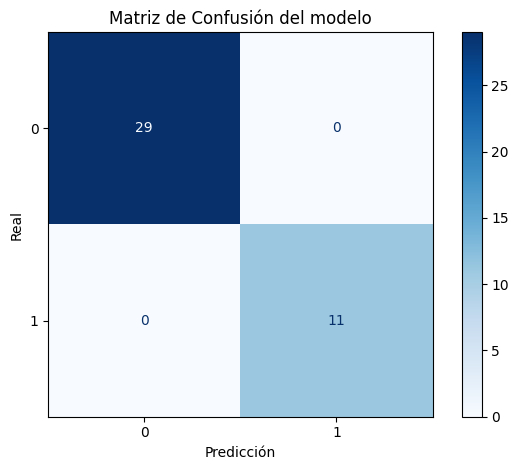

In [179]:
from scipy.stats import loguniform

#Modelo SVM mediante una pipeline
pipeline_rbf2 = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF2", SVC(kernel="rbf"))
])

#Espacio de búsqueda de hiperparámetros
dis_rbf2 = {
    "ModeloRBF2__C": loguniform(0.01, 10),
    "ModeloRBF2__gamma": ["scale", "auto"]
}

#División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)


#Randomized Search
RS_rbf2 = RandomizedSearchCV(
    estimator=pipeline_rbf2,
    param_distributions=dis_rbf2,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_rbf2.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_rbf2.predict(X_test)
print("Los mejores hiperparámetros son:", RS_rbf2.best_params_)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Las métricas de evaluación son:\n {classification_report(y_test, y_pred)}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

accuracy = RS_rbf2.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisión del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_rbf2.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión del modelo")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

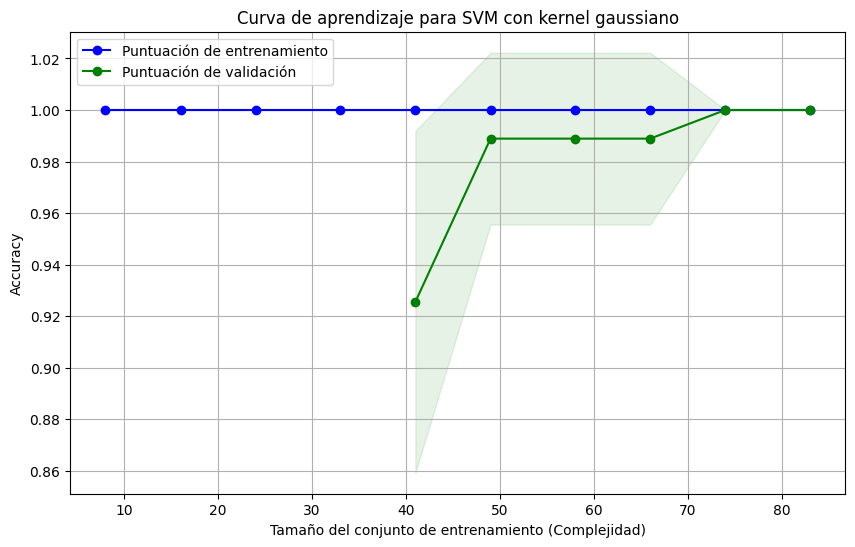

In [180]:
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Pipeline para la curva
optimos2 = RS_rbf2.best_params_
pipeline_optimo2 = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF2", SVC(kernel="rbf", C=optimos2["ModeloRBF2__C"], gamma=optimos2["ModeloRBF2__gamma"]))
])

#Generando la curva de aprendizaje para observar el posible sobreajuste. Usaremos la métrica Accuracy.
train_sizes, train_scores, test_scores = learning_curve(
    pipeline_optimo2,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    scoring='accuracy')

#Medias y desviaciones estándar de los scores (en este caso Accuracy)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Gráfica
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Puntuación de entrenamiento", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, label="Puntuación de validación", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Curva de aprendizaje para SVM con kernel gaussiano")
plt.xlabel("Tamaño del conjunto de entrenamiento (Complejidad)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()

Se redujo el overfitting, pero sigue estando presente.

**SVM mediante el kernel lineal con una regularización flotante**

Los mejores hiperparámetros son: {'ModeloLin2__C': np.float64(0.10732381160629177)}
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Las métricas de evaluación son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisión del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


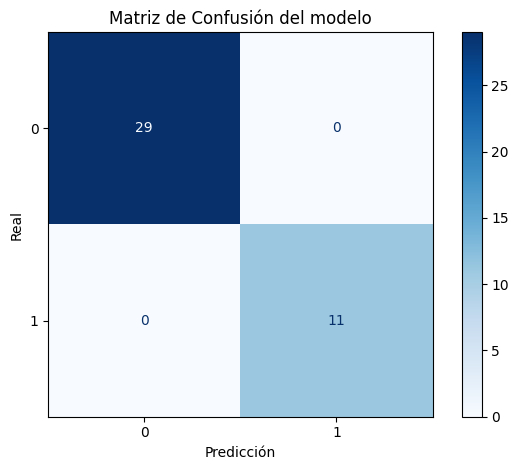

In [181]:
#Modelo SVM mediante una pipeline
pipeline_linear2 = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloLin2", SVC(kernel="linear"))
])

#Espacio de búsqueda de hiperparámetros
dis_linear2 = {
    "ModeloLin2__C":loguniform(0.01, 10),
}

#División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_linear2 = RandomizedSearchCV(
    estimator=pipeline_linear2,
    param_distributions=dis_linear2,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_linear2.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_linear2.predict(X_test)
print("Los mejores hiperparámetros son:", RS_linear2.best_params_)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Las métricas de evaluación son:\n {classification_report(y_test, y_pred)}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

accuracy = RS_linear2.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisión del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_linear2.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión del modelo")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Después de todos los modelos diseñados, parece que lo que resta para eliminar el overfitting (aunque este se redujo) es reducir la dimensión con PCA o definitivamente cambiar de modelo clasificatorio, pero esto queda fuera de los límites de este ejercicio.

